In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import math as m

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# подключаем пакеты для рендеринга русского текста в LaTeX
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
mpl.rc('text.latex', preamble=r"\usepackage[russian]{babel}")

/home/artfin/.local/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
def transform( data, start = None, end = None ):
    if ( start == None ):
        start = 0
    if ( end == None ):
        end = len(data)

    x = data[start:end, 0]
    y = data[start:end, 1]

    return np.log10(x), np.log10(y)

def least_squares( x, y ):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

def approximate( m, c, x ):
    xmin = np.min(x)
    xmax = np.max(x)

    x = np.linspace(xmin, xmax, 100) 
    y = m*x + c
    return x, y

In [3]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [23]:
def process( filename, start = None, end = None ):
    data = np.loadtxt(filename)
    x, y = transform( data, start, end )
    m, c = least_squares( x, y )
    #print(m)
    xlin, ylin = approximate(m, c, x)
    x, y = transform(data)
    
    return x, y, xlin, ylin

<IPython.core.display.Javascript object>


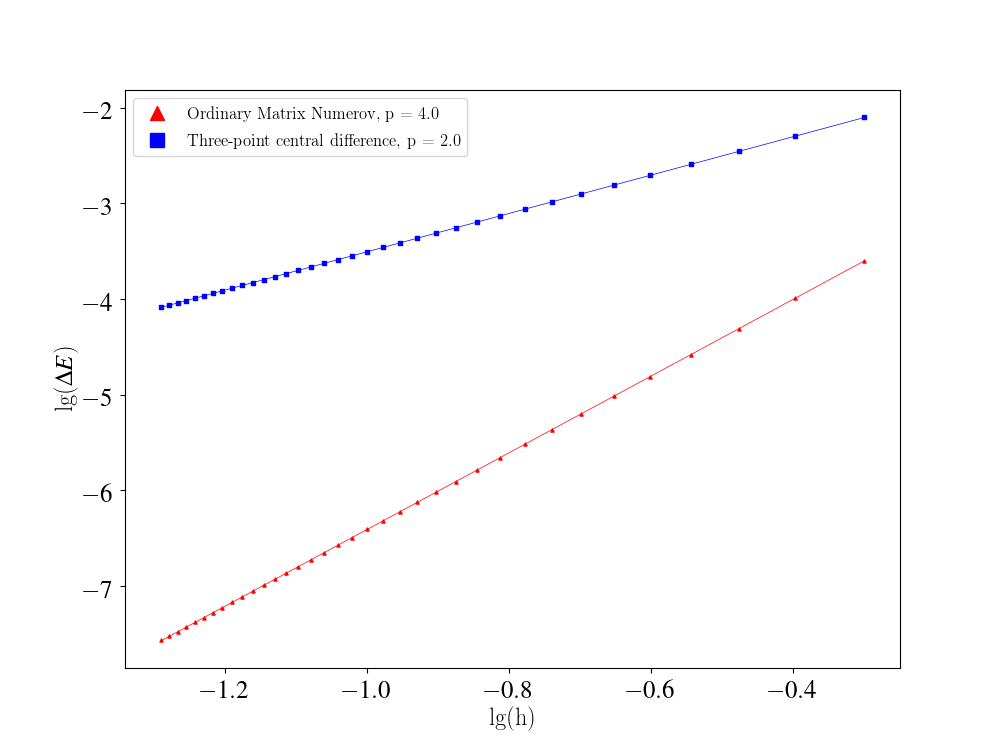

In [26]:
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111)

plt.xlabel("lg(h)")
plt.ylabel("lg($\Delta E$)")

legend_elements = [
    Line2D([0], [0], lw = 0, color = "red", marker = '^', markersize = 10, label = 'Ordinary Matrix Numerov, p = 4.0'),
    Line2D([0], [0], lw = 0, color = "blue", marker = 's', markersize = 10, label = "Three-point central difference, p = 2.0")
]

color = "red"
filename = "./4order_numerov_diff_h.txt"
x, y, xlin, ylin = process(filename, 0)
plt.plot(xlin, ylin, linewidth = 0.5, color = color)
plt.scatter(x, y, s = 5, color = color, marker = '^')

color = "blue"
filename = "./2order_central_diff_h.txt"
x, y, xlin, ylin = process(filename, 0)
plt.plot(xlin, ylin, linewidth = 0.5, color = color)
plt.scatter(x, y, s = 5, color = color, marker = 's')

ax.legend( handles = legend_elements, prop = {'size': 12} )
plt.show()

In [27]:
plt.savefig( "./numerov_vs_2order_threepoint.eps", format = 'eps', dpi = 1000 )